#### Data Preprocessing

In [10]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
df=pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# Identify columns with missing values
null_columns = df.columns[df.isnull().any()]

# Display columns with null values and their count
null_counts = df[null_columns].isnull().sum()
null_counts

children         4
country        488
agent        16340
company     112593
dtype: int64

In [13]:
# Handle missing values
df['children'].fillna(0, inplace=True)  # Replace missing children values with 0
df['country'].fillna('Unknown', inplace=True)  # Fill missing country values with 'Unknown'
df['agent'].fillna(0, inplace=True)  # Replace missing agent values with 0 (no agent)
df['company'].fillna(0, inplace=True)  # Replace missing company values with 0 (no company)

/var/folders/1c/4396k1751xz9sj3p_s1qm1wc0000gn/T/ipykernel_35224/838522390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)  # Replace missing children values with 0
/var/folders/1c/4396k1751xz9sj3p_s1qm1wc0000gn/T/ipykernel_35224/838522390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [14]:
# Identify columns with missing values
null_columns = df.columns[df.isnull().any()]

# Display columns with null values and their count
null_counts = df[null_columns].isnull().sum()
null_counts

Series([], dtype: float64)

In [15]:
df = df.drop(columns=["reservation_status", "reservation_status_date", 'deposit_type'])

In [16]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
df[cat_cols].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient


In [17]:
# Convert categorical variables
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], 
                                          categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                      'July', 'August', 'September', 'October', 'November', 'December'], 
                                          ordered=True)
df['arrival_date_month'] = df['arrival_date_month'].cat.codes

In [18]:
# Feature Engineering
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']  # Total nights stayed
df['total_guests'] = df['adults'] + df['children'] + df['babies']  # Total guests

df = df.drop(columns=["stays_in_weekend_nights", "stays_in_week_nights", 'adults', 'children', 'babies'])

In [19]:
# Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, columns=['hotel', 'meal', 'market_segment', 'distribution_channel', 
                                 'reserved_room_type', 'assigned_room_type', 
                                 'customer_type'], drop_first=True)

In [20]:
df["country"] = df["country"].map(df["country"].value_counts())

In [21]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,6,27,1,48590,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,2015,6,27,1,48590,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,6,27,1,12129,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,6,27,1,12129,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,6,27,1,12129,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [22]:
df.loc[:, df.dtypes == bool] = df.loc[:, df.dtypes == bool].astype(int)

/var/folders/1c/4396k1751xz9sj3p_s1qm1wc0000gn/T/ipykernel_35224/2627494650.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, df.dtypes == bool] = df.loc[:, df.dtypes == bool].astype(int)
/var/folders/1c/4396k1751xz9sj3p_s1qm1wc0000gn/T/ipykernel_35224/2627494650.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, df.dtypes == bool] = df.loc[:, df.dtypes == bool].astype(int)
/var/folders/1c/4396k1751xz9sj3p_s1qm1wc0000gn/T/ipykernel_35224/2627494650.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 1]' has dtype incompatible 

In [23]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,6,27,1,48590,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,6,27,1,48590,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,6,27,1,12129,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,6,27,1,12129,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,6,27,1,12129,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.to_csv("hotel_booking_cleaned.csv", index=False)

#### PCA

In [25]:
y = df['is_canceled']
X = df.drop(columns=['is_canceled'])

In [26]:
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

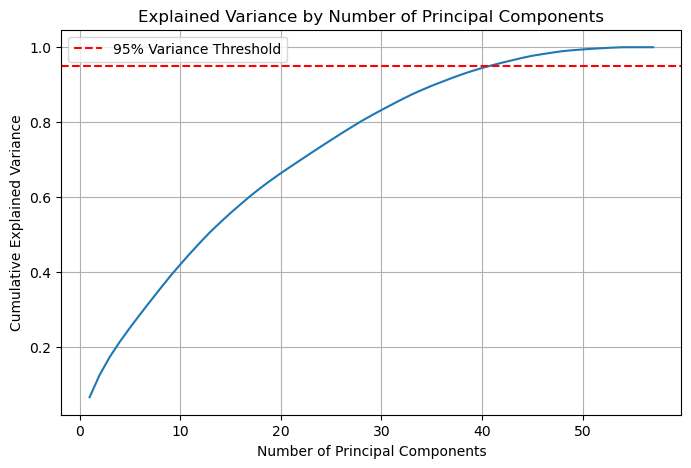

Optimal number of components: 41


In [27]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

# Find the optimal number of components (explains at least 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


In [28]:
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])

explained_variance_optimal = pca.explained_variance_ratio_.sum()
print(f"Total Explained Variance with {optimal_components} components: {explained_variance_optimal:.2%}")

Total Explained Variance with 41 components: 95.18%


In [29]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-1.283489,-5.139585,2.690765,-0.315896,-0.851800,-0.372547,-0.459767,1.944381,0.221507,-0.462363,...,3.146615,-0.494592,-0.009799,1.319681,-1.051083,-0.763881,0.303067,-1.994352,-2.709203,0.111540
1,-1.823538,-4.594333,3.382821,-0.579523,-1.291316,-0.411961,-0.318758,2.244686,0.202735,-0.521744,...,3.225306,-0.117497,-0.926611,2.199378,-1.448566,-1.190500,0.504757,-2.068816,-4.246389,-0.533661
2,-0.764911,-4.391160,0.548466,0.799685,-0.101093,-0.482069,0.299250,1.140403,0.240215,-0.804539,...,0.947013,-0.593295,-0.394302,-1.281685,-0.680846,-0.719836,0.162112,-1.799751,-0.412999,-2.885555
3,-1.390829,-2.176862,-0.779594,-0.110667,1.815386,0.407355,-0.832854,-1.605384,-0.125030,0.775361,...,0.877650,0.096853,-0.774181,-0.662460,-0.256093,-0.128874,-0.790069,0.763323,-2.208499,2.393948
4,1.005816,0.430302,0.531738,0.051867,0.974348,0.368076,-0.120760,-0.871223,-0.019309,0.158691,...,0.981913,0.418251,-0.000467,-0.604585,-0.460019,-0.384254,-0.362543,0.672668,0.295516,-0.070540


#### Classification - Random Forest

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=41)

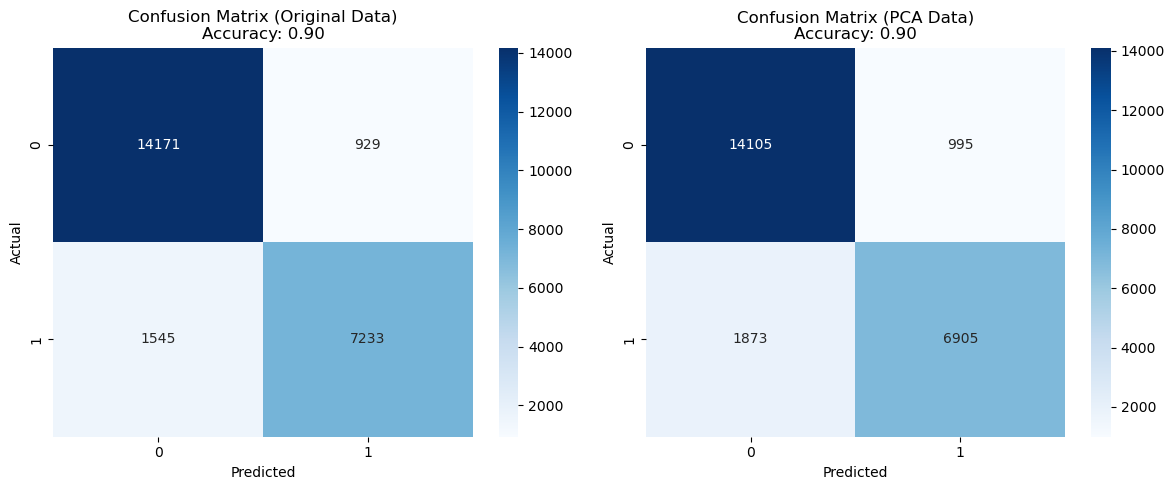

(0.9960423821090544, 0.8963899824105872, 0.9960423821090544, 0.87988943797638)

In [31]:
# Train and evaluate Random Forest on original data
rf_model = RandomForestClassifier(random_state=41)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Train and evaluate Random Forest on PCA-transformed data
rf_model_pca = RandomForestClassifier(random_state=41)
rf_model_pca.fit(X_train_pca, y_train)

y_train_pred_pca = rf_model_pca.predict(X_train_pca)
y_test_pred_pca = rf_model_pca.predict(X_test_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Original Data)\nAccuracy: {test_accuracy:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (PCA Data)\nAccuracy: {test_accuracy:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

train_accuracy, test_accuracy, train_accuracy_pca, test_accuracy_pca

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_pca = cross_val_score(rf_model_pca, X_train_pca, y_train, cv=5, scoring='accuracy')

print(cv_scores)
print(cv_scores_pca)

[0.8917971  0.89258232 0.89001152 0.89053502 0.89037797]
[0.87331833 0.87567398 0.87435871 0.8689666  0.8740446 ]


The training accuracy is much higher than cv score, meaning there is overfitting. Therefore, we reduce model complexity.

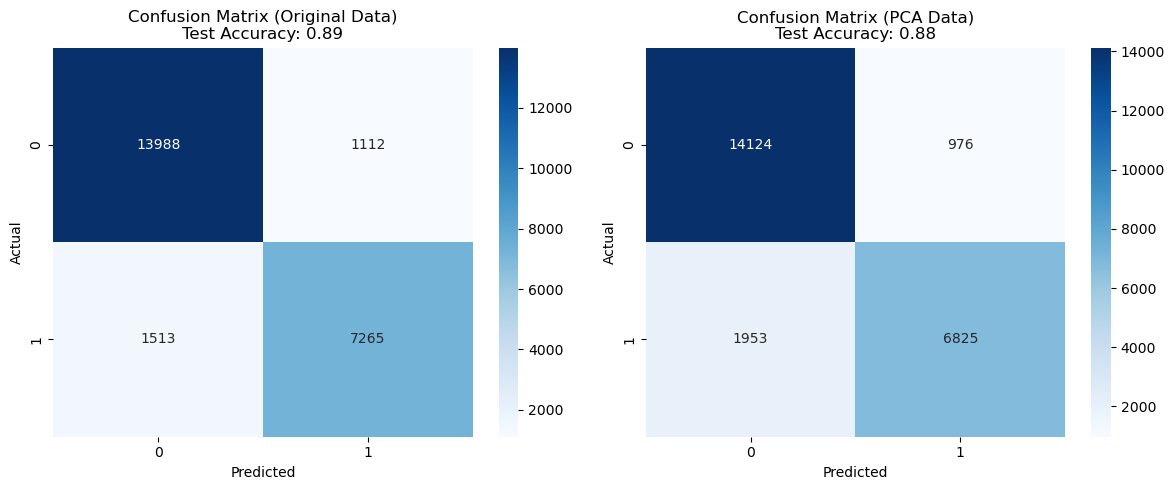

(0.9428134684646955,
 0.8900661696959544,
 0.9684751654242398,
 0.8773347851578859)

In [33]:
# Train a simplified Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=75,
    max_depth=20,
    min_samples_split=5,
    max_features=0.5,
    random_state=41)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Train and evaluate Random Forest on PCA-transformed data
rf_model_pca = RandomForestClassifier(
    n_estimators=75,
    max_depth=20,
    min_samples_split=5,
    random_state=41)
rf_model_pca.fit(X_train_pca, y_train)

y_train_pred_pca = rf_model_pca.predict(X_train_pca)
y_test_pred_pca = rf_model_pca.predict(X_test_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Original Data)\nTest Accuracy: {test_accuracy:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (PCA Data)\nTest Accuracy: {test_accuracy_pca:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Return the results
train_accuracy, test_accuracy, train_accuracy_pca, test_accuracy_pca

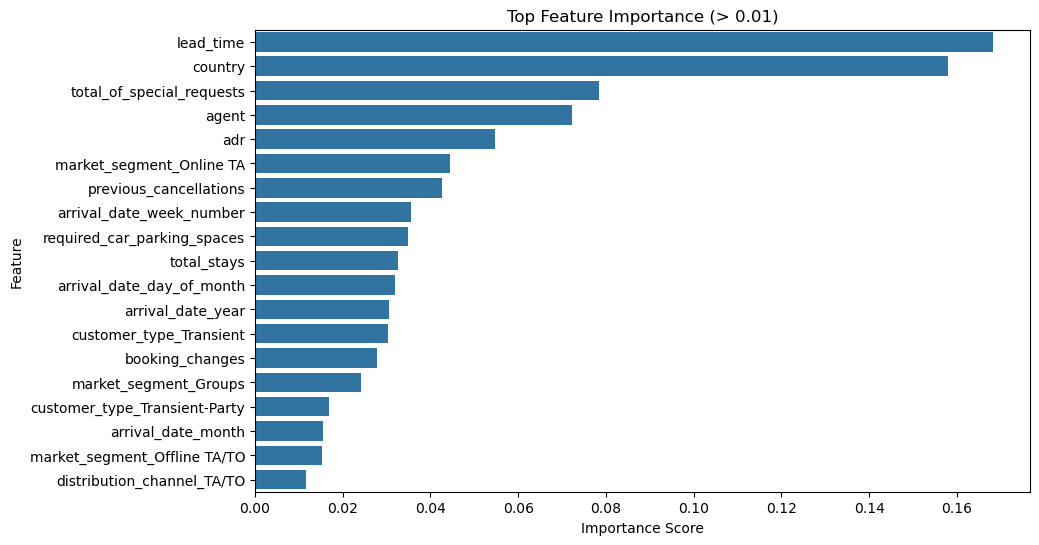

In [34]:
# Get feature importance
rf_model = RandomForestClassifier(
    n_estimators=75,
    max_depth=20,
    min_samples_split=5,
    max_features=0.5,
    random_state=41)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title('Top Feature Importance (> 0.01)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Classification - Logistic Regression

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

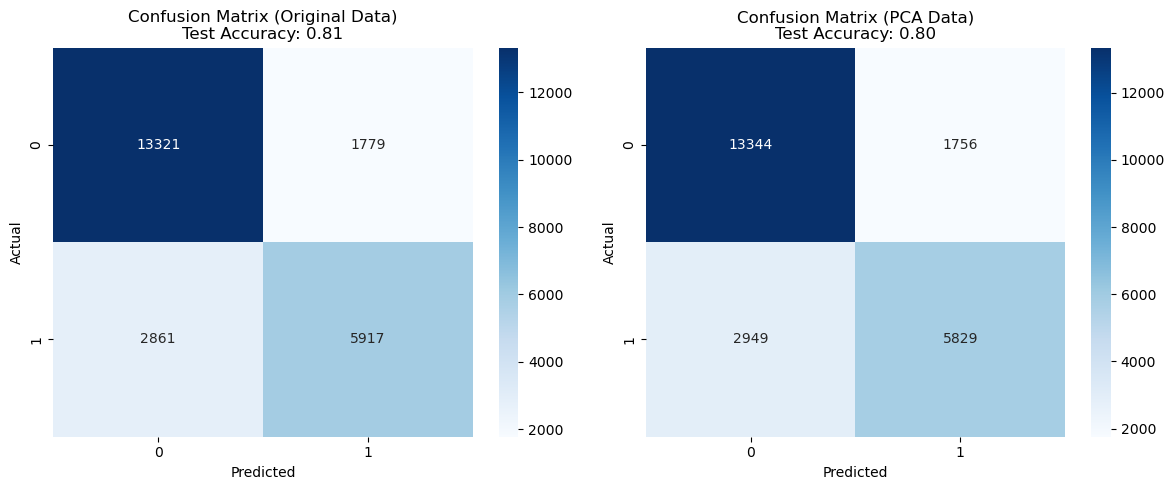

(0.8049669151520228, 0.805678867576849, 0.8019515872351118, 0.8029566965407489)

In [36]:
# Train and evaluate Logistic Regression on original data
log_reg = LogisticRegression(max_iter=500, random_state=41)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Train and evaluate Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=500, random_state=41)
log_reg_pca.fit(X_train_pca, y_train)

y_train_pred_pca = log_reg_pca.predict(X_train_pca)
y_test_pred_pca = log_reg_pca.predict(X_test_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Original Data)\nTest Accuracy: {test_accuracy:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (PCA Data)\nTest Accuracy: {test_accuracy_pca:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

train_accuracy, test_accuracy, train_accuracy_pca, test_accuracy_pca

#### Classification - SVM

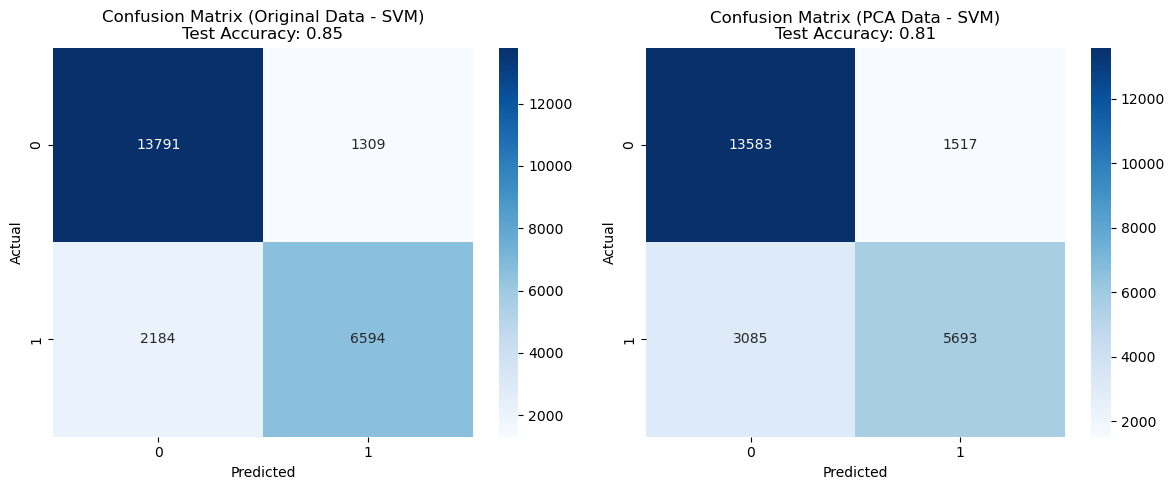

(0.8558924533042969,
 0.8537147164754167,
 0.8044329508334032,
 0.8072702906441076)

In [37]:
# Train and evaluate SVM on original data
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=41)
svm.fit(X_train_scaled, y_train)

y_train_pred_svm = svm.predict(X_train_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

# Train and evaluate SVM on PCA-transformed data
svm_pca = SVC(kernel='linear', C=1, random_state=41)
svm_pca.fit(X_train_pca, y_train)

y_train_pred_svm_pca = svm_pca.predict(X_train_pca)
y_test_pred_svm_pca = svm_pca.predict(X_test_pca)

train_accuracy_svm_pca = accuracy_score(y_train, y_train_pred_svm_pca)
test_accuracy_svm_pca = accuracy_score(y_test, y_test_pred_svm_pca)
conf_matrix_svm_pca = confusion_matrix(y_test, y_test_pred_svm_pca)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Original Data - SVM)\nTest Accuracy: {test_accuracy_svm:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (PCA Data - SVM)\nTest Accuracy: {test_accuracy_svm_pca:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

train_accuracy_svm, test_accuracy_svm, train_accuracy_svm_pca, test_accuracy_svm_pca

#### Classification - XGBoost

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


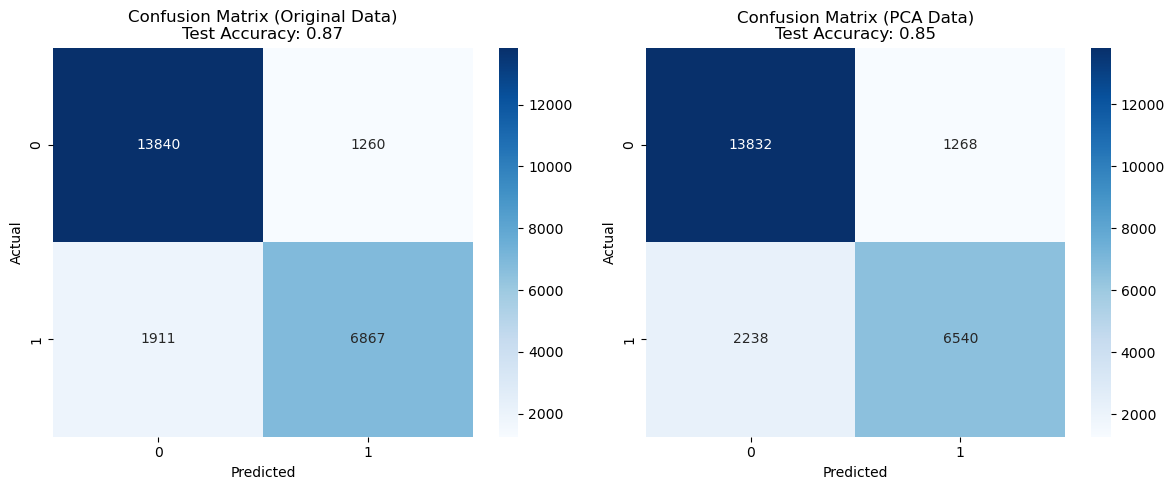

(0.8716496356478767,
 0.8671999329927129,
 0.8675454393165257,
 0.8531702822681967)

In [38]:

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=41, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Apply PCA and train XGBoost on PCA-transformed data
xgb_model_pca = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=41, use_label_encoder=False, eval_metric="logloss")
xgb_model_pca.fit(X_train_pca, y_train)

y_train_pred_pca = xgb_model_pca.predict(X_train_pca)
y_test_pred_pca = xgb_model_pca.predict(X_test_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Original Data)\nTest Accuracy: {test_accuracy:.2f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (PCA Data)\nTest Accuracy: {test_accuracy_pca:.2f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Return the results
train_accuracy, test_accuracy, train_accuracy_pca, test_accuracy_pca